<a href="https://colab.research.google.com/github/yeeh-l/Tensorflow/blob/master/DetectHeartRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H3>資工二_B0729066_葉冠志_20200729

In [1]:
from google.colab import files
uploaded=files.upload()

Saving RGBvalue.txt to RGBvalue.txt


In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(open('RGBvalue.txt'))

print(data)

[136.10151515 135.51464646 135.03989899 134.94494949 135.61010101
 135.08636364 135.12373737 135.65555556 135.2479798  135.70909091
 135.54343434 135.31515152 135.75555556 135.39444444 135.70757576
 135.79040404 136.02020202 135.81464646 135.76616162 136.16767677
 135.71767677 135.38585859 135.49494949 135.39191919 135.91919192
 135.67474747 135.33636364 135.01616162 135.90757576 135.68787879
 136.56313131 135.3        135.40252525 135.77676768 136.37373737
 136.48080808 136.04242424 135.3459596  135.68232323 136.05
 135.8959596  135.66262626 136.31313131 135.60858586 136.08131313
 135.61919192 136.24191919 136.31818182 136.51212121 136.17575758
 135.91313131 136.12626263 136.08282828 136.46212121 136.17272727
 135.77878788 136.26919192 135.96616162 136.12020202 135.85808081
 135.85252525 135.97070707 135.65454545 135.71717172 136.34343434
 135.86616162 135.52676768 135.79949495 135.57474747 136.13080808
 136.25757576 135.70909091 135.84393939 135.72272727 136.06515152
 136.08434343 13

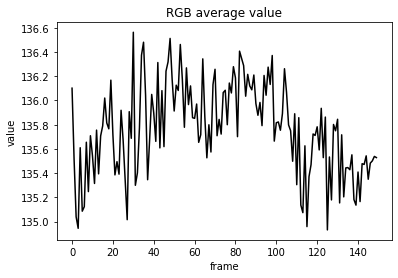

In [3]:
plt.figure()
plt.plot(data,color='black')
plt.ylabel('value')
plt.xlabel('frame')
plt.title('RGB average value')
plt.show()

In [30]:
import scipy.signal as sgl

detrend_data = sgl.detrend(data)

print(detrend_data)

[ 0.2430551  -0.34254843 -0.81603074 -0.90971507 -0.24329839 -0.7657706
 -0.7271317  -0.19404835 -0.60035895 -0.13798267 -0.30237408 -0.52939174
 -0.08772254 -0.44756849 -0.13317201 -0.04907856  0.18198458 -0.02230581
 -0.0695255   0.33325482 -0.11548002 -0.44603304 -0.33567697 -0.43744211
  0.09109579 -0.1520835  -0.48920217 -0.80813903  0.08454028 -0.13389153
  0.74262616 -0.51923999 -0.41544957 -0.03994199  0.55829287  0.66662874
  0.22951007 -0.46568942 -0.12806062  0.24088132  0.08810607 -0.1439621
  0.50780812 -0.19547217  0.27852026 -0.18233579  0.44165665  0.51918444
  0.714389    0.37929052  0.11792943  0.3323259   0.29015672  0.67071481
  0.38258604 -0.01008819  0.48158101  0.17981587  0.33512144  0.07426539
  0.069975    0.18942198 -0.12547447 -0.06158305  0.56594474  0.08993718
 -0.2481916   0.02580084 -0.19768147  0.3596443   0.48767714 -0.05954255
  0.0765711  -0.04337586  0.30031355  0.32077063  0.03769236  0.38289691
  0.3023439   0.52027573  0.42911665 -0.05446667  0.6

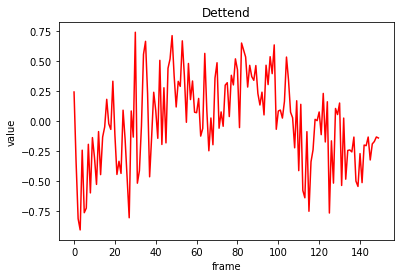

In [31]:
plt.figure()
plt.plot(detrend_data,color='red')
plt.ylabel('value')
plt.xlabel('frame')
plt.title('Dettend')
plt.show()

In [42]:
#Bandpass filter

nyq = 0.5*30
low = 0.6 / nyq
high = 2.5 / nyq

b, a = sgl.butter(5, [low,high], btype ='band')

filtered_data = sgl.lfilter(b,a,detrend_data)

print(filtered_data)

[ 4.23250618e-05  2.96966364e-04  7.84265577e-04  2.96885888e-04
 -4.51797947e-03 -1.79659634e-02 -4.20910917e-02 -7.40567774e-02
 -1.05898779e-01 -1.26376206e-01 -1.24212880e-01 -9.18943602e-02
 -2.88189023e-02  5.74212279e-02  1.52381377e-01  2.38356289e-01
  2.99011391e-01  3.23634264e-01  3.09460794e-01  2.61254199e-01
  1.88909955e-01  1.04351153e-01  1.82789877e-02 -6.24039726e-02
 -1.35039266e-01 -1.99150422e-01 -2.53551329e-01 -2.95121315e-01
 -3.20046030e-01 -3.25567379e-01 -3.10139529e-01 -2.72581720e-01
 -2.12568152e-01 -1.33193625e-01 -4.29652957e-02  4.59160179e-02
  1.22172450e-01  1.78854152e-01  2.12943102e-01  2.22888506e-01
  2.07754659e-01  1.68887899e-01  1.11699751e-01  4.56657246e-02
 -1.73916935e-02 -6.61196252e-02 -9.25869373e-02 -9.39425578e-02
 -7.20180559e-02 -3.16594243e-02  2.05225937e-02  7.62175162e-02
  1.25399035e-01  1.57798057e-01  1.65866046e-01  1.47430736e-01
  1.06180496e-01  5.00129571e-02 -1.11973012e-02 -6.75376585e-02
 -1.10845575e-01 -1.36212

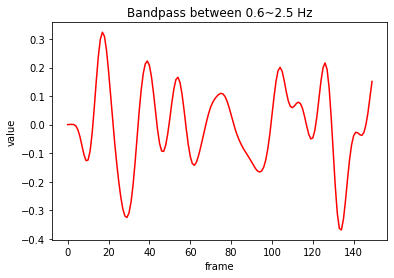

In [43]:
plt.figure()
plt.plot(filtered_data,color='red')
plt.ylabel('value')
plt.xlabel('frame')
plt.title('Bandpass between 0.6~2.5 Hz')
plt.show()

In [44]:
filtered_data = list(filtered_data)+1650*[0]
L = len(filtered_data)
times = np.arange(0,L,1)
even_times = np.linspace(times[0],times[-1],L)

interp = np.interp(even_times,times,filtered_data)
interpolated_data = np.hamming(L)*interp

L = len(interpolated_data)
freqs = float(30) / L*np.arange(L/2 +1)
freqs = 60. *freqs

raw_fft = np.fft.rfft(interpolated_data)
fft_abs = np.abs(raw_fft) **2

idx = np.where((freqs > 36) & (freqs < 150))[0]
idx_sub= idx[:-1].copy()

freqs_array = freqs[idx_sub]
fft_array = fft_abs[idx_sub]

max_arg = np.argmax(fft_array)
bpm = freqs_array[max_arg]

print(bpm)

83.0


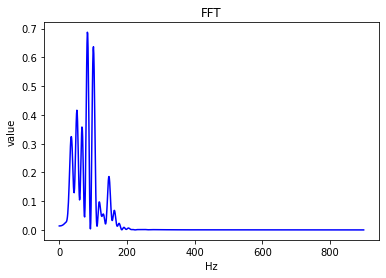

In [45]:
plt.figure()
plt.plot(fft_abs,color='blue')
plt.ylabel('value')
plt.xlabel('Hz')
plt.title('FFT')
plt.show()